In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns

In [3]:
url = 'Udemy Courses.csv'
df = pd.read_csv(url)

In [4]:
df.head(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
5,1122832,#6 Piano Hand Coordination: Play Open 10 Balla...,True,65,2015,3,21,Intermediate Level,44 mins,2017-03-08T17:53:36Z,Musical Instruments
6,1123184,#7 Piano Hand Coordination: Play Piano Runs in...,True,65,2015,2,25,Intermediate Level,1 hour,2017-03-08T18:09:32Z,Musical Instruments
7,768028,* An Integrated Approach to the Fundamentals o...,True,200,134,14,123,All Levels,5.5 hours,2016-03-15T17:23:07Z,Business Finance
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design
9,738910,[Value Investing] Where White People Keep Thei...,True,200,2715,70,20,Expert Level,4 hours,2016-05-25T21:04:41Z,Business Finance


In [5]:
df.tail(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3672,1031698,You Can Play Jazz Saxophone,True,20,37,7,6,Beginner Level,1.5 hours,2017-03-15T16:20:15Z,Musical Instruments
3673,79364,Your Business by the Numbers,True,25,29,2,42,All Levels,3 hours,2013-09-26T14:16:35Z,Business Finance
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments
3675,551170,Your First Course on Piano,True,70,2002,34,33,Beginner Level,4 hours,2015-07-16T17:07:49Z,Musical Instruments
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [7]:
df.shape

(3682, 11)

# Cleaning Data

Unnecessary data

In [9]:
df.drop(df.loc[:, ['course_title', 'published_timestamp']], axis=1, inplace=True)

Missing data

In [10]:
df.isnull().sum()

course_id           0
is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
dtype: int64

Duplicated data

In [11]:
df.duplicated().sum()

6

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

Incorrect data types

In [16]:
# convert course_id column from int64 to object
df['course_id'] = df['course_id'].astype('object')

In [17]:
# convert price column from object to int64
for i in df.index:
    if df.loc[i, 'price'] == 'Free':
        df.loc[i, 'price'] = '0'
df['price'] = df['price'].astype('int64')

Outliers

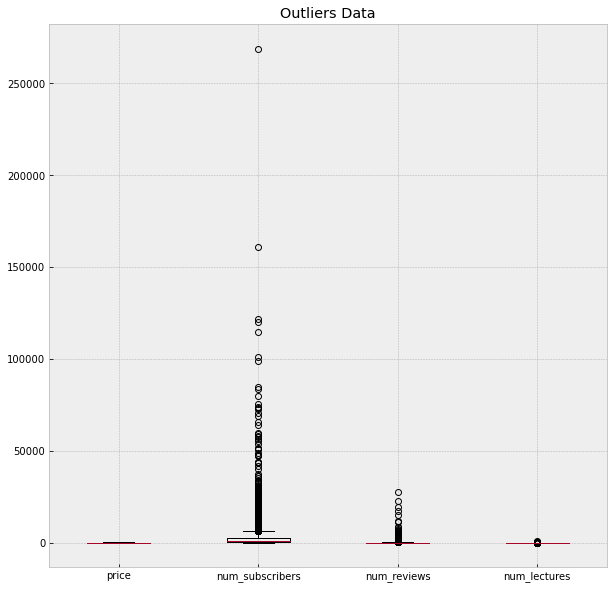

In [18]:
plt.style.use('bmh')
plt.figure(figsize=(10, 10))
plt.boxplot(df.loc[:, ['price', 'num_subscribers', 'num_reviews', 'num_lectures']],
            labels=['price', 'num_subscribers', 'num_reviews', 'num_lectures'])
plt.title('Outliers Data')
plt.show()

In [19]:
# num_subscribers
print(df['num_subscribers'].describe())

count      3676.000000
mean       3187.668934
std        9483.366476
min           0.000000
25%         111.000000
50%         912.000000
75%        2544.000000
max      268923.000000
Name: num_subscribers, dtype: float64


In [20]:
# Cleaning outliers
q1 = df['num_subscribers'].quantile(0.25)
q3 = df['num_subscribers'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'num_subscribers'] > toprange:
        df.loc[i, 'num_subscribers'] = toprange
    if df.loc[i, 'num_subscribers'] < botrange:
        df.loc[i, 'num_subscribers'] = botrange

In [21]:
# num_reviews
print(df['num_reviews'].describe())

count     3676.000000
mean       156.205114
std        935.682615
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64


In [22]:
# Cleaning outliers
q1 = df['num_reviews'].quantile(0.25)
q3 = df['num_reviews'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'num_reviews'] > toprange:
        df.loc[i, 'num_reviews'] = toprange
    if df.loc[i, 'num_reviews'] < botrange:
        df.loc[i, 'num_reviews'] = botrange

In [23]:
# num_lectures
print(df['num_lectures'].describe())

count    3676.000000
mean       40.096572
std        50.407036
min         0.000000
25%        15.000000
50%        25.000000
75%        46.000000
max       779.000000
Name: num_lectures, dtype: float64


In [24]:
# Cleaning data
q1 = df['num_lectures'].quantile(0.25)
q3 = df['num_lectures'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'num_lectures'] > toprange:
        df.loc[i, 'num_lectures'] = toprange
    if df.loc[i, 'num_lectures'] < botrange:
        df.loc[i, 'num_lectures'] = botrange

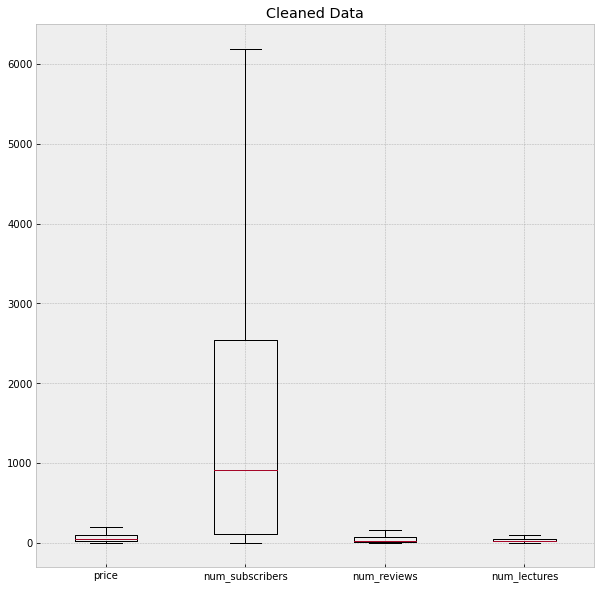

In [25]:
plt.figure(figsize=(10, 10))
plt.boxplot(df.loc[:, ['price', 'num_subscribers', 'num_reviews', 'num_lectures']],
            labels=['price', 'num_subscribers', 'num_reviews', 'num_lectures'])
plt.title('Cleaned Data')
plt.show()

# Exploring Data

In [26]:
df.head(10)

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,288942,True,35,3137.0,18.0,68.0,All Levels,1.5 hours,Musical Instruments
1,1170074,True,75,1593.0,1.0,41.0,Intermediate Level,1 hour,Musical Instruments
2,1193886,True,75,482.0,1.0,47.0,Intermediate Level,1.5 hours,Musical Instruments
3,1116700,True,75,850.0,3.0,43.0,Intermediate Level,1 hour,Musical Instruments
4,1120410,True,75,940.0,3.0,32.0,Intermediate Level,37 mins,Musical Instruments
5,1122832,True,65,2015.0,3.0,21.0,Intermediate Level,44 mins,Musical Instruments
6,1123184,True,65,2015.0,2.0,25.0,Intermediate Level,1 hour,Musical Instruments
7,768028,True,200,134.0,14.0,92.5,All Levels,5.5 hours,Business Finance
8,206592,True,25,72.0,5.0,17.0,Beginner Level,1 hour,Graphic Design
9,738910,True,200,2715.0,70.0,20.0,Expert Level,4 hours,Business Finance


In [27]:
df.tail(10)

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
3672,1031698,True,20,37.0,7.0,6.0,Beginner Level,1.5 hours,Musical Instruments
3673,79364,True,25,29.0,2.0,42.0,All Levels,3 hours,Business Finance
3674,1257976,False,0,924.0,4.0,18.0,Beginner Level,1 hour,Musical Instruments
3675,551170,True,70,2002.0,34.0,33.0,Beginner Level,4 hours,Musical Instruments
3676,498488,True,200,1079.0,34.0,16.0,All Levels,2.5 hours,Business Finance
3677,328960,True,120,1566.0,29.0,36.0,All Levels,4 hours,Web Development
3678,552700,True,70,1018.0,12.0,22.0,Beginner Level,5 hours,Musical Instruments
3679,631754,True,40,723.0,130.0,37.0,All Levels,6.5 hours,Web Development
3680,1225194,False,0,229.0,0.0,33.0,All Levels,2 hours,Business Finance
3681,964478,True,50,12.0,1.0,15.0,All Levels,1.5 hours,Graphic Design


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3681
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3676 non-null   object 
 1   is_paid           3676 non-null   bool   
 2   price             3676 non-null   int64  
 3   num_subscribers   3676 non-null   float64
 4   num_reviews       3676 non-null   float64
 5   num_lectures      3676 non-null   float64
 6   level             3676 non-null   object 
 7   content_duration  3676 non-null   object 
 8   subject           3676 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 422.1+ KB


In [29]:
df.describe()

,price,num_subscribers,num_reviews,num_lectures
count,3676.000000,3676.000000,3676.000000,3676.000000
mean,66.063656,1758.576442,45.762378,34.011289
std,61.014309,2092.849946,56.203718,25.661164
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000
50%,45.000000,912.000000,18.000000,25.000000
75%,95.000000,2544.000000,67.000000,46.000000
max,200.000000,6193.500000,161.500000,92.500000


In [30]:
# Paid Courses
df['is_paid'].value_counts()

True     3366
False     310
Name: is_paid, dtype: int64

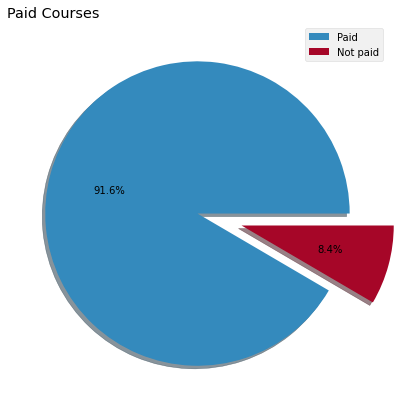

In [31]:

plt.figure(figsize=(7, 7))
plt.pie(df['is_paid'].value_counts(), explode=[0, 0.3], autopct='%1.1f%%', shadow=True)
plt.legend(['Paid', 'Not paid'], loc='upper right')
plt.title('Paid Courses', loc='left')
plt.show()

In [32]:
# Prices
df['price'].describe()

count    3676.000000
mean       66.063656
std        61.014309
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [33]:
# The most 20 frequent prices of courses
df['price'].value_counts().head(20)

20     827
50     468
0      310
200    295
40     216
30     170
25     153
95     152
100    133
195    127
35     116
150     88
45      83
75      80
60      75
120     37
55      35
85      31
65      30
125     30
Name: price, dtype: int64

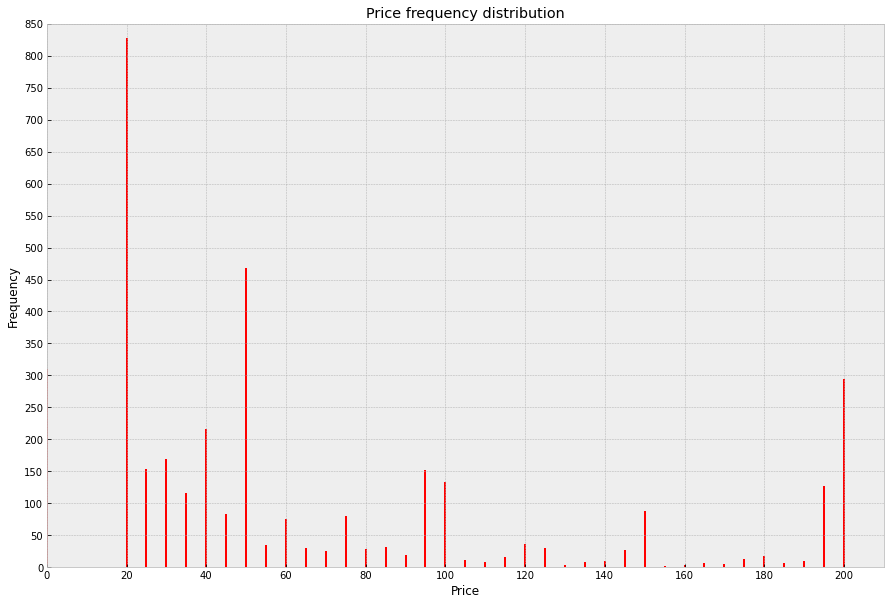

In [34]:
price = np.array(df['price'])
plt.figure(figsize=(15, 10))
plt.xlim(0, 210)
plt.xticks(np.arange(0, 201, 20))
plt.ylim(0, 850)
plt.yticks(np.arange(0, 851, 50))
plt.hist(price, color='r', rwidth=0.5, align='left', bins=[i for i in range(202)])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price frequency distribution')
plt.show()

In [35]:
# Free courses
print(df[df['price'] == 0]['price'].count())

310


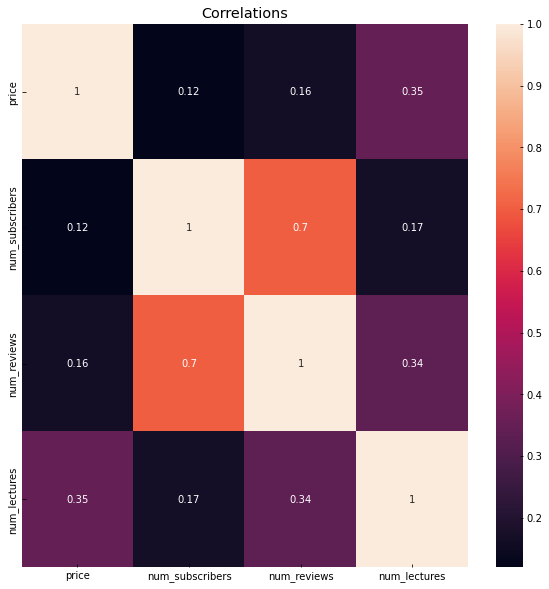

In [36]:
# Correlations between price, num_subscribers, num_reviews, and 'num_lectures'
plt.figure(figsize=(10, 10))
sns.heatmap(df.loc[:, ['price', 'num_subscribers', 'num_reviews', 'num_lectures']].corr(), annot=True)
plt.title('Correlations')
plt.show()

In [37]:
# level column
df['level'].describe()

count           3676
unique             4
top       All Levels
freq            1928
Name: level, dtype: object

In [38]:
# Levels of courses
df['level'].value_counts()

All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

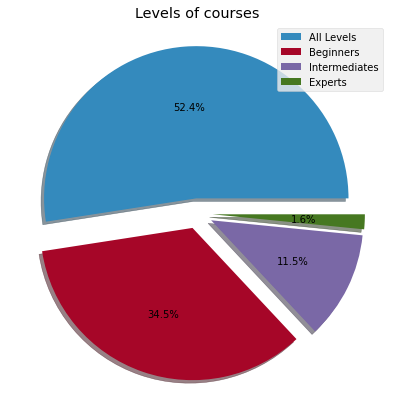

In [39]:
plt.figure(figsize=(7, 7))
plt.pie(df['level'].value_counts(), explode=[0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True)
plt.legend(['All Levels', 'Beginners', 'Intermediates', 'Experts'], loc='upper right')
plt.title('Levels of courses')
plt.show()

In [40]:
# Average prices in levels of courses
df.groupby('level')['price'].mean()

level
All Levels            73.023859
Beginner Level        55.717100
Expert Level          91.120690
Intermediate Level    61.923990
Name: price, dtype: float64

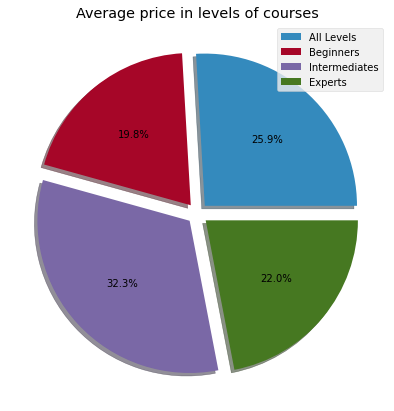

In [41]:
plt.figure(figsize=(7, 7))
plt.pie(np.array(df.groupby('level')['price'].mean()), explode=[0.07, 0.07, 0.07, 0.07], autopct='%1.1f%%', shadow=True)
plt.legend(['All Levels', 'Beginners', 'Intermediates', 'Experts'], loc='upper right')
plt.title('Average price in levels of courses')
plt.show()

In [42]:
# Average number of subscribers in levels of courses
df.groupby('level')['num_subscribers'].mean()

level
All Levels            1811.917531
Beginner Level        1845.280930
Expert Level           865.448276
Intermediate Level    1375.991686
Name: num_subscribers, dtype: float64

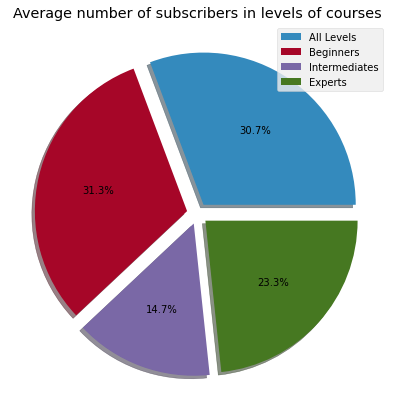

In [43]:
plt.figure(figsize=(7, 7))
plt.pie(np.array(df.groupby('level')['num_subscribers'].mean()), explode=[0.07, 0.07, 0.07, 0.07], autopct='%1.1f%%', shadow=True)
plt.legend(['All Levels', 'Beginners', 'Intermediates', 'Experts'], loc='upper right')
plt.title('Average number of subscribers in levels of courses')
plt.show()

In [44]:
# Average number of lectures in levels of courses
df.groupby('level')['num_lectures'].mean()

level
All Levels            37.008299
Beginner Level        30.188337
Expert Level          29.663793
Intermediate Level    32.408551
Name: num_lectures, dtype: float64

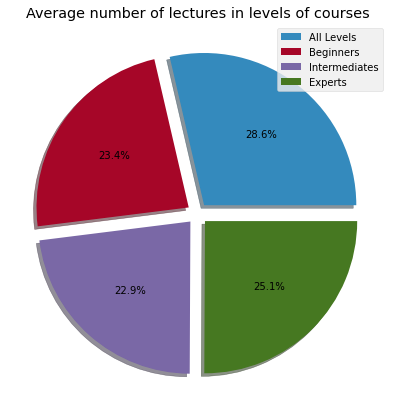

In [45]:
plt.figure(figsize=(7, 7)) 
plt.pie(np.array(df.groupby('level')['num_lectures'].mean()), explode=[0.07, 0.07, 0.07, 0.07], autopct='%1.1f%%', shadow=True)
plt.legend(['All Levels', 'Beginners', 'Intermediates', 'Experts'], loc='upper right')
plt.title('Average number of lectures in levels of courses')
plt.show()

In [46]:
# Duration
df['content_duration'].describe()

count       3676
unique       109
top       1 hour
freq         606
Name: content_duration, dtype: object

In [47]:
# The most 10 frequent durations
df['content_duration'].value_counts().head(10)

1 hour       606
1.5 hours    506
2 hours      419
2.5 hours    269
3 hours      248
3.5 hours    182
4 hours      144
4.5 hours    113
5 hours      108
5.5 hours     93
Name: content_duration, dtype: int64

In [49]:
# Subjects
df['subject'].describe()

count                3676
unique                  4
top       Web Development
freq                 1199
Name: subject, dtype: object

In [50]:
# Subjects of courses
df['subject'].value_counts()

Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

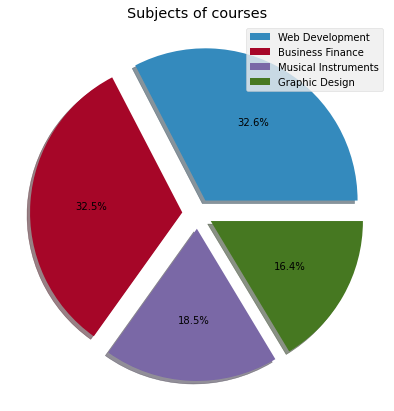

In [51]:
plt.figure(figsize=(7, 7))
plt.pie(df['subject'].value_counts(), explode=[0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True)
plt.legend(['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design'], loc='upper right')
plt.title('Subjects of courses')
plt.show()

In [52]:
# Levels of subjects of courses
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        242
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            658
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

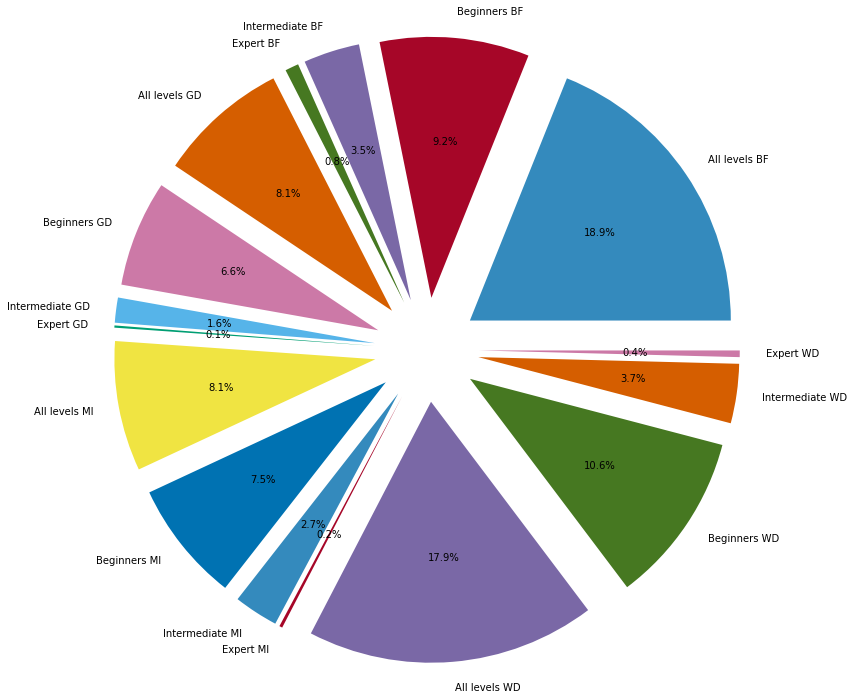

In [53]:
plt.figure(figsize=(12, 12))
LevSubjs = df.groupby('subject')['level'].value_counts()
labels = ['All levels BF', 'Beginners BF', 'Intermediate BF', 'Expert BF',
          'All levels GD', 'Beginners GD', 'Intermediate GD', 'Expert GD',
          'All levels MI', 'Beginners MI', 'Intermediate MI', 'Expert MI',
          'All levels WD', 'Beginners WD', 'Intermediate WD', 'Expert WD']
explodes = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
            0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
plt.pie(LevSubjs, autopct='%1.1f%%', labels=labels, explode=explodes)
plt.show()

In [54]:
# Levels of top courses' prices
topCourses = df[df['price'] == df['price'].max()]
topCourLev = topCourses['subject'].value_counts()
topCourLev

Business Finance       128
Web Development        113
Graphic Design          35
Musical Instruments     19
Name: subject, dtype: int64

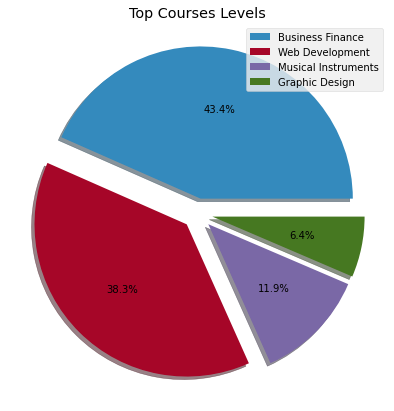

In [55]:
plt.figure(figsize=(7, 7))
plt.pie(topCourLev, autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True)
plt.title('Top Courses Levels')
plt.legend(['Business Finance', 'Web Development', 'Musical Instruments', 'Graphic Design'], loc='upper right')
plt.show()